In [1]:

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import Masking
from sklearn.preprocessing import normalize
from keras.models import load_model
from keras.utils import multi_gpu_model
import math

import keras
import pickle
import numpy as np
from tensorflow.python.client import device_lib
from keras import backend as K
from keras.utils import to_categorical

print(device_lib.list_local_devices()) # list of DeviceAttributes

# %gui qt
import numpy as np
import mne
import pickle
import sys
import os
import matplotlib

import matplotlib.pyplot as plt

# import vispy
# print(vispy.sys_info())
# BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append(BASE_DIR)
%matplotlib inline
mne.utils.set_config('MNE_USE_CUDA', 'true')  
mne.cuda.init_cuda(verbose=True)


hot= {
    'paced':0,
    'slowBreath':1,
    'stressor':2,
    'baseline':3,
    'sync':4,
    'survey':5,
    'rest':6
}

good={
    'paced':True,
    'slowBreath':True,
    'rest':False,
    'baseline':True,
    'sync':False,
    'survey':False,
    'stressor':True
}

Using TensorFlow backend.


AttributeError: module 'tensorflow.python.keras.backend' has no attribute 'get_graph'

In [14]:
def doStuff(name):
    data=pickle.load(open('processed', 'rb'))
    features=[]
    labels=[]
    for elem in data:
        labels.append(elem[0])
        features.append(elem[1])
    print(len(features), len(labels))
    print(labels[0])
    train_X = np.array(features[0:int(7*len(labels)/10)])
    train_y = np.array(labels[0:int(7*len(labels)/10)])

    test_X = np.array(features[int(7*len(labels)/10):-1])
    test_y = np.array(labels[int(7*len(labels)/10):-1])
    
#     train_X = features
#     train_y = labels

#     test_X = features
#     test_y = labels
    
    
    train_y = to_categorical(train_y, num_classes=5)
    test_y = to_categorical(test_y, num_classes=5)

    print(test_y)

    print("train_X shape is", train_X.shape)
    print("train_y shape is", train_y.shape)
    print("test_X shape is", test_X.shape)
    print("test_y shape is", test_y.shape)
    
#     train_X=keras.preprocessing.sequence.pad_sequences(train_X, maxlen=125*uniformLength, dtype='float32', padding='pre', truncating='pre', value=-9999)
#     test_X=keras.preprocessing.sequence.pad_sequences(test_X, maxlen=125*uniformLength, dtype='float32', padding='pre', truncating='pre', value=-9999)
    
    print("train_X shape is", train_X.shape)
    print("train_y shape is", train_y.shape)
    print("test_X shape is", test_X.shape)
    print("test_y shape is", test_y.shape)
    
    # train_y=normalize(train_y.reshape(-1, 1), axis=0)
    # test_y=normalize(test_y.reshape(-1, 1), axis=0)

    # design network
    model = Sequential()
#     model.add(Masking(mask_value=-9999, input_shape=(1250, test_X.shape[-1])))
#     model.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99))
    
    model.add(LSTM(40, return_sequences=True, input_shape=(1250, test_X.shape[-1])))
#     model.add(keras.layers.Dropout(0.1))
    model.add(LSTM(25))
    model.add(keras.layers.Dropout(0.3))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(20, activation='sigmoid'))
    model.add(keras.layers.Dropout(0.3))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(train_y.shape[1], activation='softmax'))
#     model = multi_gpu_model(model)
    sgd = keras.optimizers.SGD(learning_rate=0.015, momentum=0.0, nesterov=False)
    adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    # fit network

    history = model.fit(train_X, train_y, epochs=1000, batch_size=200, validation_data=(test_X, test_y), verbose=2, shuffle=True)
    # plot history
    pyplot.figure(figsize=(25,10), dpi=250)
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.plot(history.history['accuracy'], label='accuracy')
    pyplot.plot(history.history['val_accuracy'], label='test accuracy')
    pyplot.legend()
    pyplot.savefig(name + '.png')

    name=name+'-1000ep'
    pickle.dump(history, open( name+'-hist.p', "wb"))
    model.save(name+'.h5')

1526 1526
0
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
train_X shape is (1068, 1250, 68)
train_y shape is (1068, 5)
test_X shape is (457, 1250, 68)
test_y shape is (457, 5)
train_X shape is (1068, 1250, 68)
train_y shape is (1068, 5)
test_X shape is (457, 1250, 68)
test_y shape is (457, 5)
Train on 1068 samples, validate on 457 samples
Epoch 1/1000
 - 16s - loss: 1.7485 - accuracy: 0.2425 - val_loss: 1.6650 - val_accuracy: 0.2451
Epoch 2/1000
 - 15s - loss: 1.6922 - accuracy: 0.2444 - val_loss: 1.6397 - val_accuracy: 0.2451
Epoch 3/1000
 - 14s - loss: 1.6675 - accuracy: 0.2350 - val_loss: 1.6222 - val_accuracy: 0.2451
Epoch 4/1000
 - 15s - loss: 1.6365 - accuracy: 0.2519 - val_loss: 1.6106 - val_accuracy: 0.2407
Epoch 5/1000
 - 15s - loss: 1.6301 - accuracy: 0.2444 - val_loss: 1.6010 - val_accuracy: 0.2429
Epoch 6/1000
 - 15s - loss: 1.6100 - accuracy: 0.2566 - val_loss: 1.5947 - val_accuracy: 0.2451
Epoch 7/1000
 -

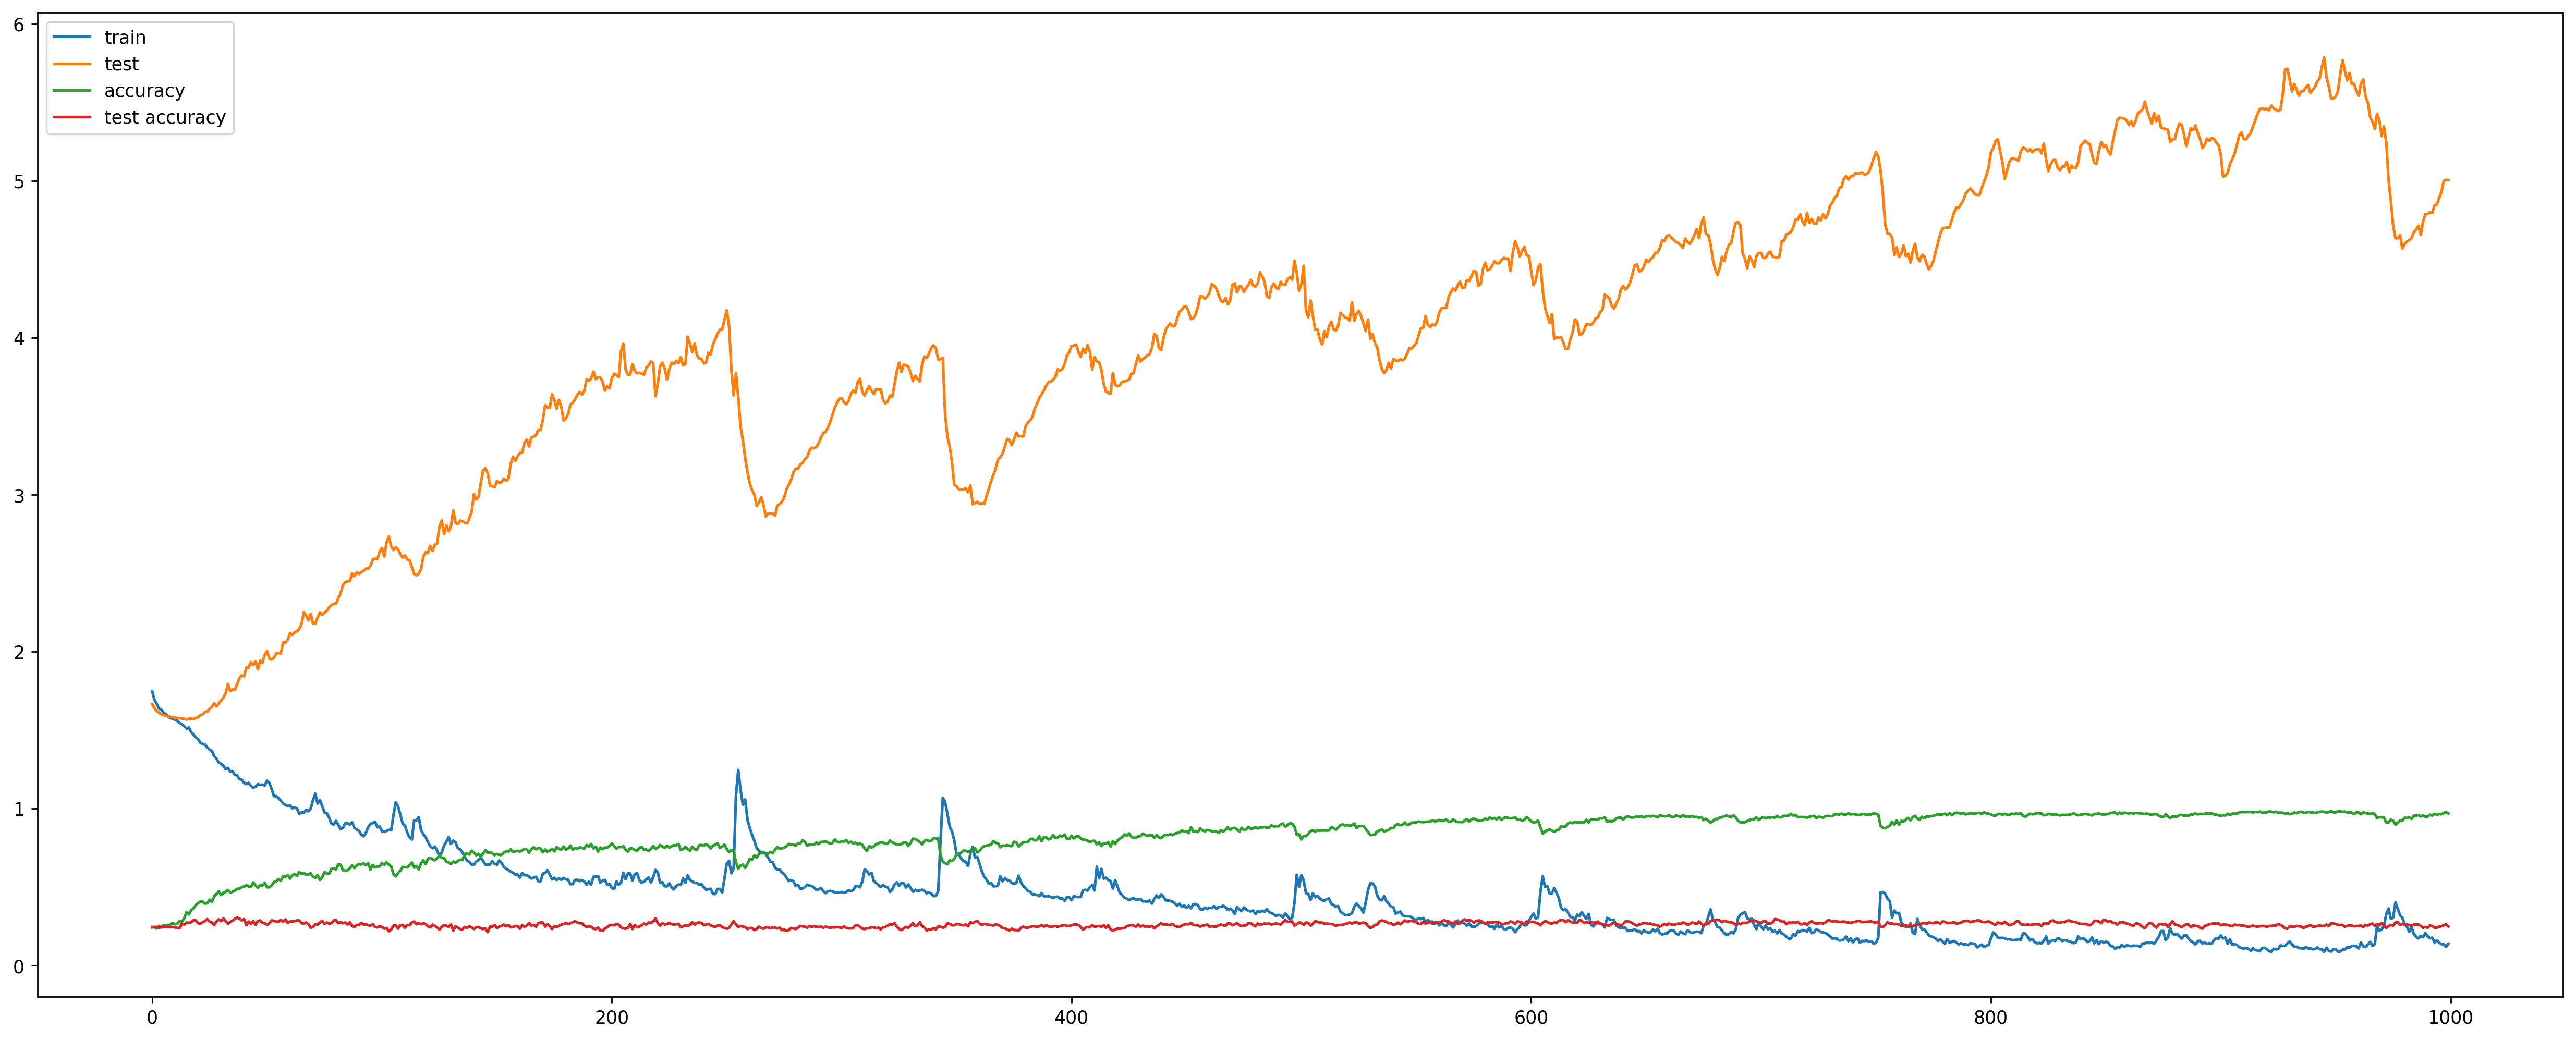

In [15]:
doStuff('V4-5')

In [7]:
!~/gdrive-linux-x64 upload -r --parent 1vhs7zre7sOnRuWLeVT_sL7SMQpfFnrkx ~/pench/models-high-double-lstm/

Creating directory models-high-double-lstm
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-02-14_11-43-46-EIGHT-1000ep.h5
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-02-07_12-09-54-SIX.png
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-02-10_10-55-19=ONE.2.png
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-02-10_10-55-19=ONE.2-1000ep-hist.p
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-03-06_10-28-17-LUKE-1000ep.h5
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-02-07_10-42-36-FOUR.2-1000ep.h5
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-02-06_12-08-05-THREE-1000ep-hist.p
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-02-29_17-19-28-ELI-1000ep-hist.p
Uploading /home/sean/pench/models-high-double-lstm/OpenBCISession_2020-02-23_16-49-310-VIR-1000ep.h5
Uploading /home/sean/pench/models-high-doubl

In [8]:
print(hi)

NameError: name 'hi' is not defined

In [ ]:
# make a prediction
yhat = model.predict(np.array(test_X))
np.set_printoptions(precision=8)
np.set_printoptions(suppress=True)

print(yhat)

In [ ]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)